In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/fverdian/class/soundspeed-scripts/kernels-fullnum/numerical-integrals')
from num_kernels import NumKernels, PLfromClass

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})


In [2]:
fx=0.1
t_ini = -6
fullt=np.linspace(t_ini,30, 200)
teval=0
kref=1
supprshift=5
nk = NumKernels(fx=fx, kref=kref, fullt=fullt, rtol=0.0001)

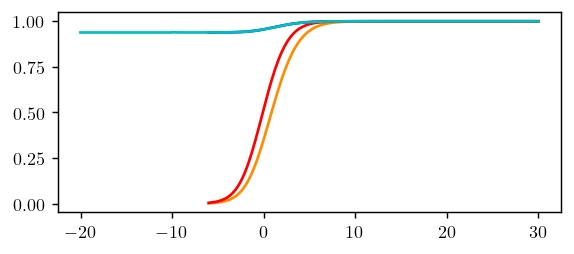

In [3]:
def g_ank(k):
    return nk.g_an(-2*np.log(k/kref))

def check_hotini(k, t_ini=t_ini):
    if nk.g_an(t_ini-2*np.log(k/kref))>0.1:
        print(f'\033[93mWARNING:\033[0m the mode k={k:.1e} is not deep inside, g({t_ini} + {-2*np.log(k/kref):.1f} )={nk.g_an(t_ini-2*np.log(k/kref)):.1f}')

plt.figure(figsize=(5,2), dpi=130)
plt.plot(fullt, nk.g_c_int(fullt), 'b', label=r'$\Theta$')
plt.plot(fullt, nk.g_an(fullt), 'darkorange', label=r'$\delta_\chi$')
plt.plot(fullt, nk.h_an(fullt), 'r', label=r'$\delta_\chi$')

extrat=np.linspace(-20,30, 300)
plt.plot(extrat, nk.g_c_int(extrat), 'c', label=r'$\Theta$')
plt.show()

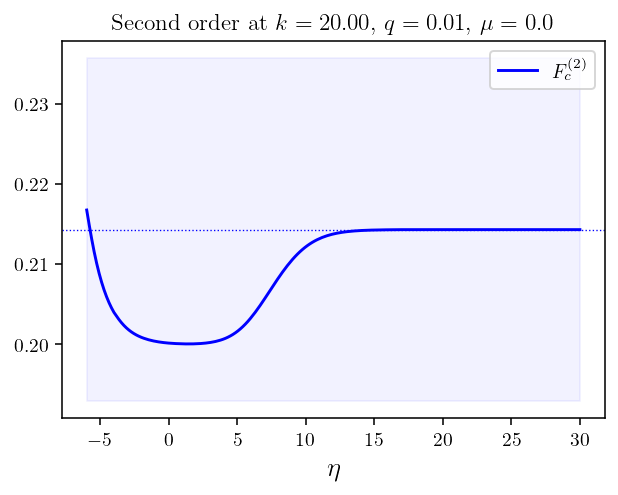

In [4]:
kp=20
qp=0.01
mup=0.0
kMq = np.sqrt(kp**2 + qp**2 - 2*kp*qp*mup)
cT12 = (kp*mup-qp)/kMq

sol=nk.solve_F2([qp,kMq,cT12], return_timedep=True)

plt.figure(figsize=(5,3.5), dpi=140)
plt.plot(nk.fullt, sol[:,0], 'b', label=r'$F_c^{(2)}$')
plt.axhline(nk.F2_0(kp,qp,mup), color='b', linestyle=':', linewidth=0.7)
# plt.axhline(F2(kp,qp,mup)+fx*DeltaF2q_Mq__midlim(kp,qp,mup)[0], color='m', linewidth=0.7)
plt.fill_between(fullt, nk.F2_0(kp,qp,mup)*(1-fx),nk.F2_0(kp,qp,mup)*(1+fx), alpha=0.05, color='b')

plt.legend()
plt.title(r'Second order at $k='+'%.2f'%kp+r'$, $q='+'%.2f'%qp+r'$, $\mu='+'%.1f'%mup+r'$')
plt.xlabel(r'$\eta$', fontsize=14)
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F2_kers_eta.pdf', bbox_inches='tight')
plt.show()

In [8]:
qlist=np.logspace(-3,1.4,10)
G2_qlist=[]
mup=1.
qp=1.e-4

for kp in qlist:
    print(f'k={kp:.1e}', end='\r', flush=True)
    g_k=nk.g_an(-2*np.log(kp/kref));g_q=nk.g_an(-2*np.log(qp/kref))
    kMq = np.sqrt(kp**2 + qp**2 - 2*kp*qp*mup)
    cT12 = (kp*mup-qp)/kMq
    F2cnum, G2cnum, _, G2xnum=nk.solve_F2([qp,kMq,cT12])

    F3_cval, G3c, _, G3x=nk.solve_F3([kp,qp,mup])

    G2_qlist.append([G2cnum,nk.G2_0(kp,qp,mup), G2xnum,nk.G2_0(kp,qp,mup)*g_q*nk.g_an(-2*np.log(kMq/kref)),
                       G3c,nk.G3_0(kp,qp,mup),G3x,nk.G3_0(kp,qp,mup)*g_k*g_q*g_q])
G2_qlist=np.array(G2_qlist)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.6000000000000D+01   r2 =  0.1049636019533D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.6000000000000D+01   r2 =  0.1049636019533D-15


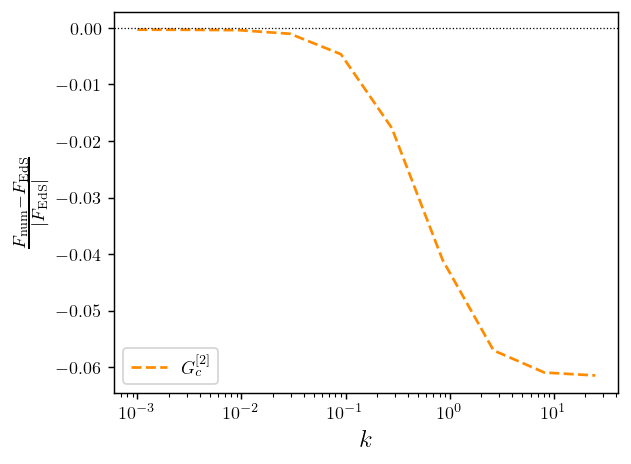

In [6]:
plt.figure(figsize=(5,3.8), dpi=130)
G2c, G2c_EdS, G2x, G2x_EdS, G3c, G3c_EdS, G3x, G3x_EdS = G2_qlist.T

plt.plot(qlist, (G2c-G2c_EdS)/np.abs(G2c_EdS), color='darkorange', linestyle='--', label=r'$G^{[2]}_c$')
# plt.plot(qlist, (G3c-G3c_EdS)/np.abs(G3c_EdS), 'darkorange', label=r'$G^{[3]}_c$')

# plt.plot(qlist, (G2x-G2x_EdS)/np.abs(G2x_EdS), 'm--', label=r'$G^{[2]}_\chi$')
# plt.plot(qlist, (G3x-G3x_EdS)/np.abs(G3x_EdS), 'm', label=r'$G^{[3]}_\chi$')
plt.axhline(0., color='k', linestyle=':', linewidth=0.7)
# plt.axhline(-6/7*fx, color='darkorange', linestyle=':', linewidth=1)
# plt.text(5, -0.2, r'$=-\frac{6}{7}f_\chi$', color='darkorange')

plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r"$\frac{F_\mathrm{num}-F_\mathrm{EdS}}{|F_\mathrm{EdS}|}$", fontsize=14)
plt.legend()
plt.xscale('log')
plt.show()

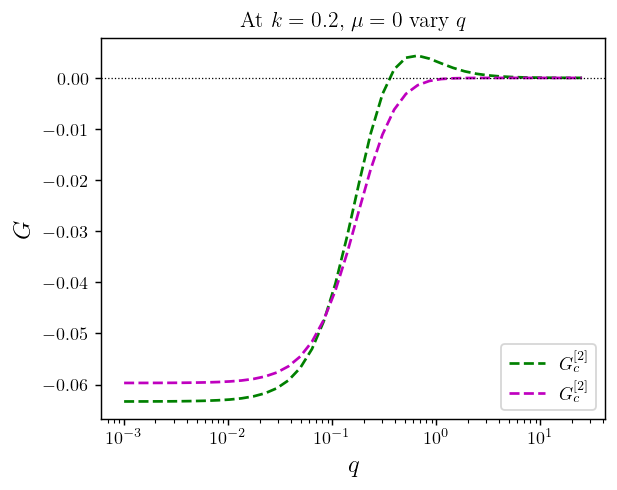

In [21]:
qlist=np.logspace(-3,1.4,40)
G2_qlist=[]
mup=0.
kp=0.2
for qp in qlist:
    print(f'k={kp:.1e}', end='\r', flush=True)
    g_k=nk.g_an(-2*np.log(kp/kref));g_q=nk.g_an(-2*np.log(qp/kref))
    kMq = np.sqrt(kp**2 + qp**2 - 2*kp*qp*mup)
    cT12 = (kp*mup-qp)/kMq
    F2cnum, G2cnum, _, G2xnum=nk.solve_F2([qp,kMq,cT12])

    G2_qlist.append([G2cnum,nk.G2_0(kp,qp,mup), G2xnum,nk.G2_0(kp,qp,mup)*g_q*nk.g_an(-2*np.log(kMq/kref))])
G2_qlist=np.array(G2_qlist)

plt.figure(figsize=(5,3.8), dpi=130)
G2c, G2c_EdS, G2x, G2x_EdS= G2_qlist.T

plt.plot(qlist, (G2x), color='g', linestyle='--', label=r'$G^{[2]}_c$')
plt.plot(qlist, G2x_EdS, color='m', linestyle='--', label=r'$G^{[2]}_c$')
# plt.plot(qlist, (G2x-G2x_EdS)/np.abs(G2x_EdS), color='darkorange', linestyle='--', label=r'$G^{[2]}_c$')

plt.axhline(0., color='k', linestyle=':', linewidth=0.7)
plt.title(r'At $k=0.2$, $\mu=0$ vary $q$')
plt.xlabel(r'$q$', fontsize=14)
plt.ylabel(r"$G$", fontsize=14)
plt.legend()
plt.xscale('log')
plt.show()


In [10]:
qlist=np.logspace(0,0.1,10)
Flist=[];Flist_EdS=[]
mup=1.
kp=0.1
for qp in qlist:
    print(f'q={qp:.1e}', end='\r', flush=True)
    kMq = np.sqrt(kp**2 + qp**2 - 2*kp*qp*mup)
    cT12 = (kp*mup-qp)/kMq
    solF3=nk.solve_F3([kp,qp,mup])
    Flist.append(solF3[0])
    Flist_EdS.append(nk.F3_0(kp,qp,mup))
Flist=np.array(Flist);Flist_EdS=np.array(Flist_EdS);


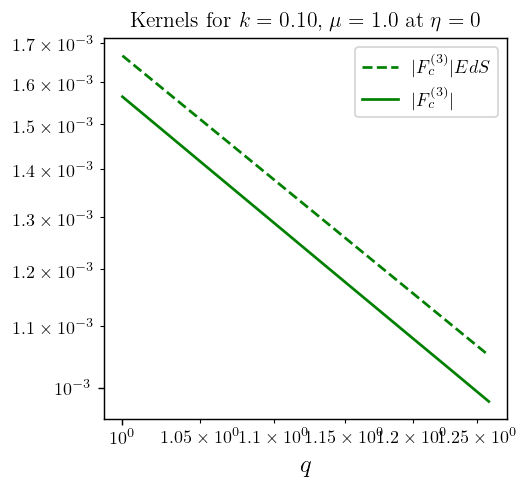

In [11]:
plt.figure(figsize=(4,3.8), dpi=130)
plt.plot(qlist, np.abs(Flist_EdS), 'g--', label=r'$|F_c^{(3)}| EdS$')
plt.plot(qlist, np.abs(Flist), 'g', label=r'$|F_c^{(3)}|$')

plt.legend()
plt.title(r'Kernels for $k='+'%.2f'%kp+r'$, $\mu='+'%.1f'%mup+r'$ at $\eta=0$')
# plt.ylabel(r'$F/F_\mathrm{EdS}-1$', fontsize=14)
plt.xlabel(r'$q$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F3_limitB_ofq.pdf', bbox_inches='tight')
plt.show()

----
PLOTS PER MEGA TABELLA

F2 di chi

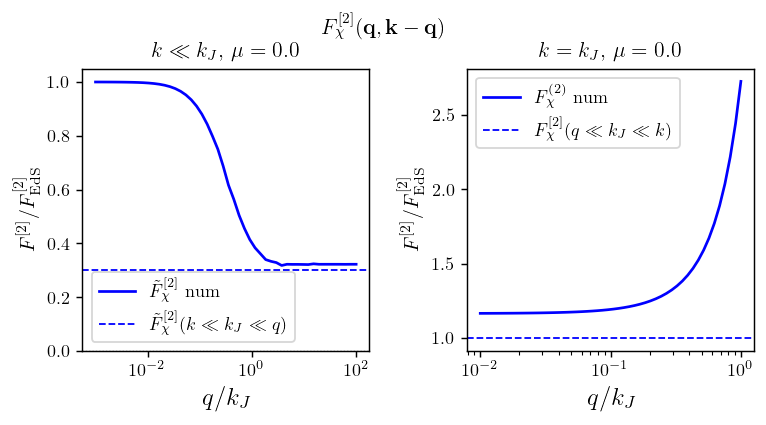

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.5), dpi=130)

mup=0. #MUST EVALUATE IT AT mu=0, otherwise the eds has a divergence
kplow=1.e-3
qlist=np.logspace(-3,2,50)
Flist_low=[];Flist_high=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r')
    kMq = np.sqrt(kplow**2 + qp**2 - 2*kplow*qp*mup)
    cT12 = (kplow*mup-qp)/kMq
    F2c,_,F2x,_=solve_second_order([qp,kMq,cT12], return_timedep=False)
    Flist_low.append([F2x,F2(kplow,qp,mup)])
Flist_low=np.array(Flist_low);

# First plot
ax1.plot(qlist,Flist_low[:,0]/Flist_low[:,1], 'b', label=r'$\tilde F_\chi^{[2]}$ num')
F2chi_qkMq_limB = 3/10
ax1.axhline(F2chi_qkMq_limB, color='b', linestyle='--', linewidth=1, label=r'$\tilde F_\chi^{[2]}(k\ll k_J \ll q$)')
ax1.axhline(0, color='k', linestyle=':', linewidth=0.7)
ax1.legend()
ax1.set_ylim([0.,None])
ax1.set_title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax1.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
ax1.set_xscale('log')
ax1.set_xlabel(r'$q/k_J$', fontsize=14)

kphigh=1
qlist=np.logspace(-2,0,50)
Flist_high=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r', flush=True)
    kMq = np.sqrt(kphigh**2 + qp**2 - 2*kphigh*qp*mup)
    cT12 = (kphigh*mup-qp)/kMq
    F2c,_,F2x,_=solve_second_order([qp,kMq,cT12], return_timedep=False)
    Flist_high.append([F2x/g_ank(kMq)/g_ank(qp),F2(kphigh,qp,mup)])
Flist_high=np.array(Flist_high)

# Second plot
ax2.plot(qlist,Flist_high[:,0]/Flist_high[:,1], 'b', label=r'$F_\chi^{(2)}$ num')
ax2.axhline(1, color='b', linestyle='--', linewidth=1, label=r'$F_\chi^{[2]}(q\ll k_J \ll k$)')
ax2.legend()
ax2.set_title(r'$k= k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax2.set_xscale('log')
# ax2.set_ylim([-0.5,0.5])
ax2.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
ax2.set_xlabel(r'$q/k_J$', fontsize=14)
plt.suptitle(r'$F_\chi^{[2]}(\mathbf{q},\mathbf{k}-\mathbf{q})$',y=0.92)
plt.tight_layout()
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F2chi_qkMq.pdf', bbox_inches='tight')
plt.show()

NameError: name 'solve_second_order' is not defined

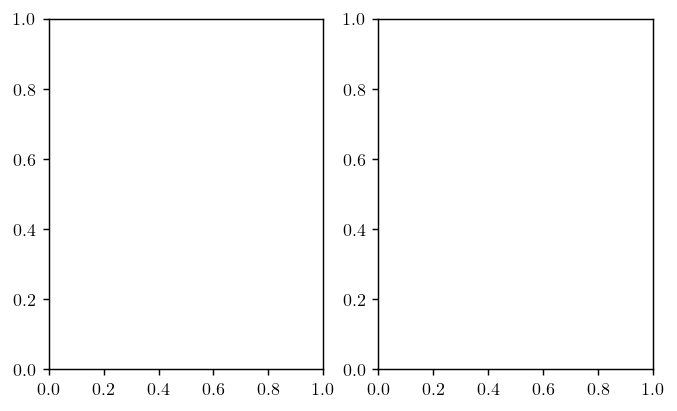

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.5), dpi=130)

mup=0.5 #MUST EVALUATE IT AT mu=0, otherwise the eds has a divergence
kplow=1.e-2
qlist=np.logspace(-2,np.log10(30),50)
Flist_low=[];Flist_high=[]
for qp in qlist:
    F2c,_,F2x,_=solve_second_order([kplow,qp,mup], return_timedep=False)
    Flist_low.append([F2x/g_ank(qp),F2G2_EdS(kplow,qp,mup)[0]])
Flist_low=np.array(Flist_low);

# First plot
ax1.plot(qlist,Flist_low[:,0]/Flist_low[:,1]-1, 'm', label=r'$F_\chi^{[2]}$ num')
ax1.axhline(0., color='m', linestyle='--', linewidth=1, label=r'$F_\chi^{[2]}(k\ll k_J \ll q$)')
ax1.axhline(0, color='k', linestyle=':', linewidth=0.7)
ax1.legend()
ax1.set_ylim([-0.5,0.5])
ax1.set_title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax1.set_ylabel(r'$F^{[2]}/F_2-1$', fontsize=11)
ax1.set_xscale('log')
ax1.set_xlabel(r'$q/k_J$', fontsize=14)

kphigh=1
qlist=np.logspace(-2,0,50)
Flist_high=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r')
    F2c,_,F2x,_=solve_second_order([kphigh,qp,mup], return_timedep=False)
    Flist_high.append([F2x/g_ank(qp)/g_ank(kphigh),F2G2_EdS(kphigh,qp,mup)[0]])
Flist_high=np.array(Flist_high)
# Second plot
ax2.plot(qlist,Flist_high[:,0]/Flist_high[:,1]-1, 'm', label=r'$F_\chi^{(2)}$ num')
ax2.axhline(1-1, color='m', linestyle='--', linewidth=1, label=r'$F_\chi^{[2]}(q\ll k_J \ll k$)')
ax2.legend()
ax2.set_title(r'$k= k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax2.set_xscale('log')
ax2.set_ylim([-0.2,0.5])
ax2.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}-1$', fontsize=11)
ax2.set_xlabel(r'$q/k_J$', fontsize=14)
plt.suptitle(r'$F_\chi^{[2]}(\mathbf{k},\mathbf{q})$',y=0.92)
plt.tight_layout()
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F2chi_kq.pdf', bbox_inches='tight')

plt.show()

F2 di cold

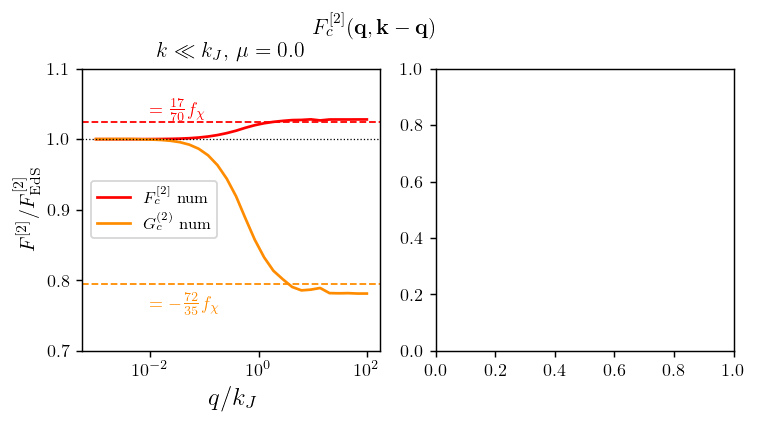

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.5), dpi=130)

mup=0. #MUST EVALUATE IT AT mu=0, otherwise the eds has a divergence
kplow=1.e-3
qlist=np.logspace(-3,2,30)
Flist_low=[];Flist_high=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r')
    kMq = np.sqrt(kplow**2 + qp**2 - 2*kplow*qp*mup)
    cT12 = (kplow*mup-qp)/kMq
    F2c,G2_c,F2x,_=nk.solve_F2([qp,kMq,cT12])
    Flist_low.append([F2c,nk.F2_0(kplow,qp,mup), G2_c, nk.G2_0(kplow,qp,mup)])
Flist_low=np.array(Flist_low);

# First plot
ax1.plot(qlist,Flist_low[:,0]/Flist_low[:,1], 'r', label=r'$F_c^{[2]}$ num')
ax1.plot(qlist,Flist_low[:,2]/Flist_low[:,3], 'darkorange', label=r'$G_c^{(2)}$ num')
DeltaF2c_qkMq_limB = (51*fx)/210
ax1.axhline(1+DeltaF2c_qkMq_limB, color='r', linestyle='--', linewidth=1)
ax1.axhline(1, color='k', linestyle=':', linewidth=0.7)
ax1.axhline(1-72/35*fx, color='darkorange', linestyle='--', linewidth=1)

ax1.text(1.e-2, 1.035, r'$=\frac{17}{70}f_\chi$', color='r')
ax1.text(1.e-2, 0.76, r'$=-\frac{72}{35}f_\chi$', color='darkorange')
ax1.legend(fontsize=9, loc='center left')
ax1.set_ylim([0.7,1.1])
ax1.set_title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax1.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
ax1.set_xscale('log')
ax1.set_xlabel(r'$q/k_J$', fontsize=14)

# kphigh=10
# qlist=np.logspace(-3,3,60)
# Flist_high=[]
# for qp in qlist:
#     print(f'q={qp:.1e}', end='\r', flush=True)
#     kMq = np.sqrt(kphigh**2 + qp**2 - 2*kphigh*qp*mup)
#     cT12 = (kphigh*mup-qp)/kMq
#     F2c,G2_c,F2x,_=nk.solve_F2([qp,kMq,cT12], return_timedep=False)
#     Flist_high.append([F2c,nk.F2_0(kphigh,qp,mup), G2_c, nk.G2_0(kphigh,qp,mup)])
# Flist_high=np.array(Flist_high)

# # Second plot
# ax2.plot(qlist,Flist_high[:,0]/Flist_high[:,1], 'r', label=r'$F_c^{(2)}$ num')
# ax2.plot(qlist,Flist_high[:,2]/Flist_high[:,3], 'darkorange', label=r'$G_c^{(2)}$ num')

# DeltaF2c_qkMq_limD = -23/35*fx
# ax2.axhline(1+DeltaF2c_qkMq_limD, color='r', linestyle='--', linewidth=1, label=r'$-\frac{23}{35}f_\chi$')
# DeltaF2c_qkMq_limC = 4/35*fx
# ax2.axhline(1+DeltaF2c_qkMq_limC, color='r', linestyle='-.', linewidth=1, label=r'$\frac{4}{35}f_\chi$')
# ax2.axhline(1, color='k', linestyle=':', linewidth=0.7)
# ax2.legend()
# ax2.set_title(r'$k\gg k_J$'+r', $\mu='+'%.1f'%mup+r'$')
# ax2.set_xscale('log')
# ax2.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
# ax2.set_xlabel(r'$q/k_J$', fontsize=14)
plt.suptitle(r'$F_c^{[2]}(\mathbf{q},\mathbf{k}-\mathbf{q})$',y=0.92)
plt.tight_layout()
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F2c_qkMq.pdf', bbox_inches='tight')
plt.show()

F3 di chi

In [18]:
mup=0. #MUST EVALUATE IT AT mu=0, otherwise the eds has a divergence
kphigh=10
qlist=np.logspace(-2,0,10)
F3list_high=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r', flush=True)
    F3c,_,F3x,_=nk.solve_F3([kphigh,qp,mup], return_timedep=False)
    F3list_high.append([F3x/g_ank(kphigh)/g_ank(qp)/g_ank(qp),nk.F3_0(kphigh,qp,mup),-1/6*(mup*kphigh/qp)**2])
F3list_high=np.array(F3list_high);

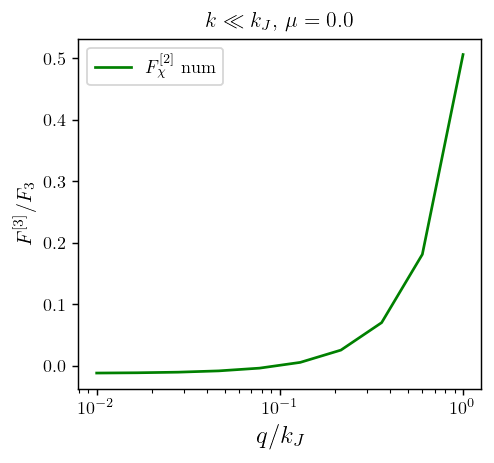

In [19]:
plt.figure(figsize=(4, 3.5), dpi=130)
pole=-1/6*(mup*kphigh/qlist)**2
plt.plot(qlist,F3list_high[:,0]-F3list_high[:,1], 'g', label=r'$F_\chi^{[2]}$ num')
# plt.plot(qlist,(pole), 'g:', label=r'$F_\chi^{[2]}$ num')

plt.legend()
plt.title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
plt.ylabel(r'$F^{[3]}/F_3$', fontsize=11)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$q/k_J$', fontsize=14)
plt.show()

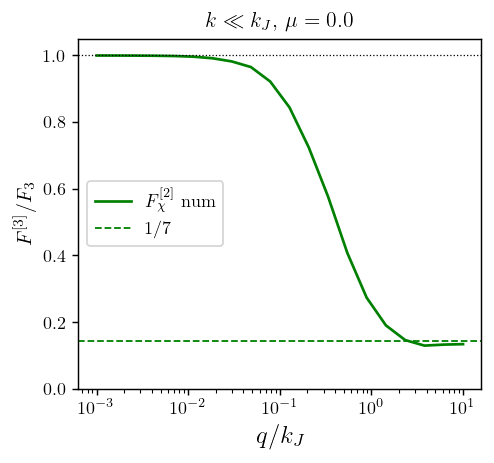

In [16]:
mup=0. #MUST EVALUATE IT AT mu=0, otherwise the eds has a divergence
kplow=1.e-4
qlist=np.logspace(-3,np.log10(10),20)
F3list_low=[]
for qp in qlist:
    print(f'q={qp:.1e}', end='\r', flush=True)
    F3c,_,F3x,_=nk.solve_F3([kplow,qp,mup], return_timedep=False)
    F3list_low.append([F3x,nk.F3_0(kplow,qp,mup)])
F3list_low=np.array(F3list_low);
plt.figure(figsize=(4, 3.5), dpi=130)

plt.plot(qlist,F3list_low[:,0]/F3list_low[:,1], 'g', label=r'$F_\chi^{[2]}$ num')
plt.axhline(1., color='k', linestyle=':', linewidth=0.7)
plt.axhline(1/7, color='g', linestyle='--', linewidth=1, label=r'1/7')
plt.ylim(0.,1.05)

plt.legend()
plt.title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
plt.ylabel(r'$F^{[3]}/F_3$', fontsize=11)
plt.xscale('log')
plt.xlabel(r'$q/k_J$', fontsize=14)
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F3chi_limB.pdf', bbox_inches='tight')

plt.show()

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.5), dpi=130)


# First plot
ax1.plot(qlist,Flist_low[:,0]/Flist_low[:,1], 'r', label=r'$\tilde F_\chi^{[2]}$ num')
DeltaF2c_qkMq_limB = (51*fx)/210
ax1.axhline(1+DeltaF2c_qkMq_limB, color='r', linestyle='--', linewidth=1, label=r'$\tilde F_c^{[2]}(k\ll k_J \ll q)$')
ax1.axhline(1, color='k', linestyle=':', linewidth=0.7)
ax1.text(1.e-2, 1.028, r'$=\frac{17}{70}f_\chi$', color='r')
ax1.legend()
ax1.set_ylim([0.99,1.1])
ax1.set_title(r'$k\ll k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax1.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
ax1.set_xscale('log')
ax1.set_xlabel(r'$q/k_J$', fontsize=14)



# Second plot
ax2.plot(qlist,Flist_high[:,0]/Flist_high[:,1], 'r', label=r'$F_\chi^{(2)}$ num')
DeltaF2c_qkMq_limD = -23/35*fx
ax2.axhline(1+DeltaF2c_qkMq_limD, color='r', linestyle='--', linewidth=1, label=r'$-\frac{23}{35}f_\chi$')
DeltaF2c_qkMq_limC = 4/35*fx
ax2.axhline(1+DeltaF2c_qkMq_limC, color='r', linestyle='-.', linewidth=1, label=r'$\frac{4}{35}f_\chi$')
ax2.axhline(1, color='k', linestyle=':', linewidth=0.7)
ax2.legend()
ax2.set_title(r'$k\gg k_J$'+r', $\mu='+'%.1f'%mup+r'$')
ax2.set_xscale('log')
ax2.set_ylabel(r'$F^{[2]}/F^{[2]}_\mathrm{EdS}$', fontsize=11)
ax2.set_xlabel(r'$q/k_J$', fontsize=14)
plt.suptitle(r'$F_c^{[2]}(\mathbf{q},\mathbf{k}-\mathbf{q})$',y=0.92)
plt.tight_layout()
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/F2c_qkMq.pdf', bbox_inches='tight')
plt.show()

0.9999995357422323

In [1]:
print(f'{0.0045722:.2g}')

0.0046
